<a href="https://colab.research.google.com/github/Pragna235/ACM-Winter-School-Hands-on-Labs/blob/main/Lab_2_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

Experimenting on the Artifical Neural Network (ANN) Model

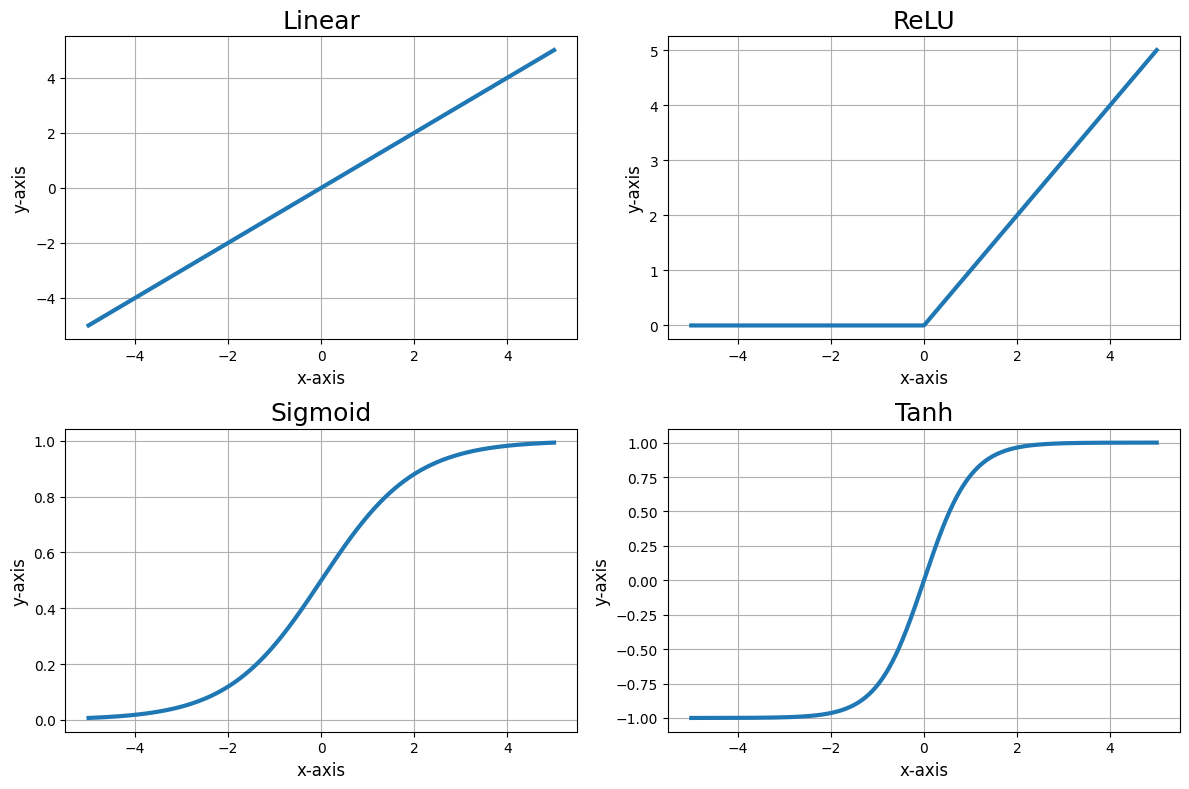

In [1]:
#Activation Functions

import numpy as np
import matplotlib.pyplot as plt

def linear(x):
  return x

def relu(x):
  return np.maximum(0,x)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
  return np.tanh(x)

x = np.linspace(-5,5,1000)

fig,axes = plt.subplots(2,2,figsize=(12,8))

axes[0,0].plot(x,linear(x),linewidth=3)
axes[0,0].set_title('Linear',fontsize=18)
axes[0,0].grid()

axes[0,1].plot(x,relu(x),linewidth=3)
axes[0,1].set_title('ReLU',fontsize=18)
axes[0,1].grid()

axes[1,0].plot(x,sigmoid(x),linewidth=3)
axes[1,0].set_title('Sigmoid',fontsize=18)
axes[1,0].grid()

axes[1,1].plot(x,tanh(x),linewidth=3)
axes[1,1].set_title('Tanh',fontsize=18)
axes[1,1].grid()

for ax in axes.flat:
  ax.set(xlabel='x-axis',ylabel='y-axis')
  ax.xaxis.label.set_size(12)
  ax.yaxis.label.set_size(12)

fig.tight_layout()
plt.show()

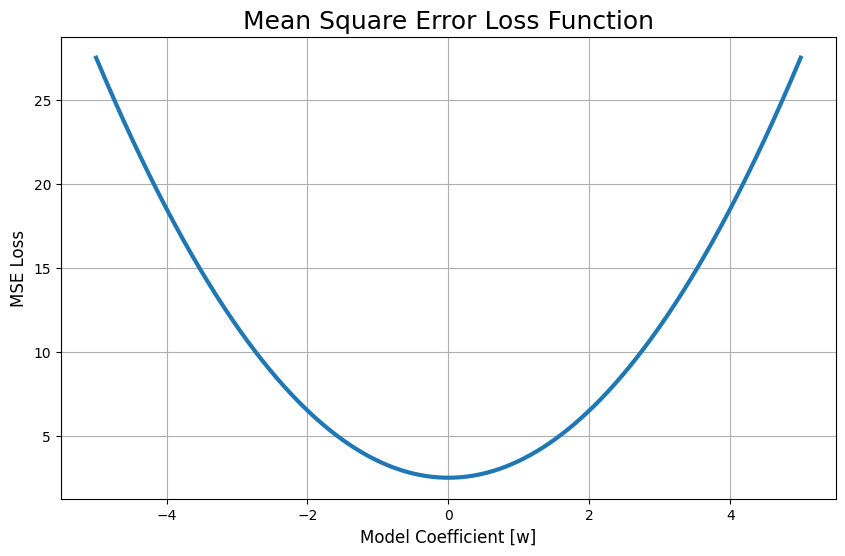

In [2]:
# MSE Loss Function

import numpy as np
import matplotlib.pyplot as plt

def mse_loss(y_true,y_pred):
  return np.mean((y_true - y_pred)**2) + 2.5

y_true=0 # Assume the true value is 0 for simplicity
x = np.linspace(-5,5,1000)
mse = [mse_loss(y_true,y_pred) for y_pred in x]

plt.figure(figsize=(10,6))
plt.plot(x,mse,linewidth=3)
plt.title('Mean Square Error Loss Function',fontsize=18)
plt.xlabel('Model Coefficient [w]',fontsize=12)
plt.ylabel('MSE Loss',fontsize=12)
plt.grid()
plt.show()

# Wine Dataset Prediction Project


In [3]:
# The Wine dataset contains information about the chemical composition of wines from three different countries
# The dataset has 13 features, including alcohol content, malic acid and color intensity
# The target variable is the class level of the wine, which is an integer (1,2,or 3)
# The project objective is to clasify the wine into one of the three classes based on its chemical compositions

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical,plot_model

In [5]:
# Load the dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
data['class'] = wine.target

data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [6]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
data.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [8]:
data.shape

(178, 14)

In [9]:
data['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [11]:
# Split the dataset into training and testing sets
x = data.drop('class',axis=1)
y = data['class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape , x_test.shape

((142, 13), (36, 13))

In [12]:
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [13]:
y_train[:10]

158    2
137    2
98     1
159    2
38     0
108    1
85     1
68     1
143    2
2      0
Name: class, dtype: int64

In [14]:
# One-hot encodes the target labels. One-hot encoding prevents algorithms from treating categorical values as numbers
# It ensures equal distance between catogeries and helps algorithms learn moew effectively

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

y_train_one_hot[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [15]:
# Build the ANN model

model = Sequential([
    Dense(64,activation = 'relu', input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(3,activation = 'softmax')
])

# reLU, which stands for Rectified Linear Unit, is an activation function commonly used in neural networks
# The function introduces non-linearity to the model, allowing it to learn complex patterms amd relationships in the model
# Softmax is a mathematical function that takes as input a vector of numerical scores or logits and converts them to probability distribution of possible outcomes

In [16]:
model.summary()
#13 features*64 + bias(64) -- dense 1
#64*32+ bias(32) -- dense 2
#32*3 + bias(3) --dense 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


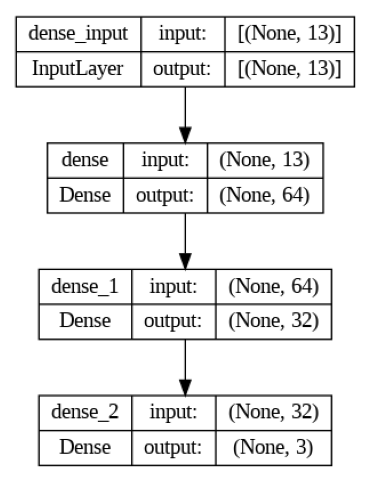

In [17]:
#Plot the ANN model
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True)
plt.figure(figsize=(8,6))
img=plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [18]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Train the model and save its history
h=model.fit(x_train,y_train_one_hot,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 2s 178ms/step - loss: 1.1465 - accuracy: 0.4646 - val_loss: 1.2245 - val_accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 25ms/step - loss: 1.0032 - accuracy: 0.5827 - val_loss: 1.0719 - val_accuracy: 0.4000
Epoch 3/100
4/4 [==============================] - 0s 30ms/step - loss: 0.8813 - accuracy: 0.6220 - val_loss: 0.9426 - val_accuracy: 0.4667
Epoch 4/100
4/4 [==============================] - 0s 45ms/step - loss: 0.7803 - accuracy: 0.7087 - val_loss: 0.8376 - val_accuracy: 0.6000
Epoch 5/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6917 - accuracy: 0.7638 - val_loss: 0.7457 - val_accuracy: 0.7333
Epoch 6/100
4/4 [==============================] - 0s 23ms/step - loss: 0.6173 - accuracy: 0.7953 - val_loss: 0.6642 - val_accuracy: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 38ms/step - loss: 0.5500 - accuracy: 0.8819 - val_loss: 0.5940 - val_accuracy: 0.9333
Epoch 8/100
4/4 [==

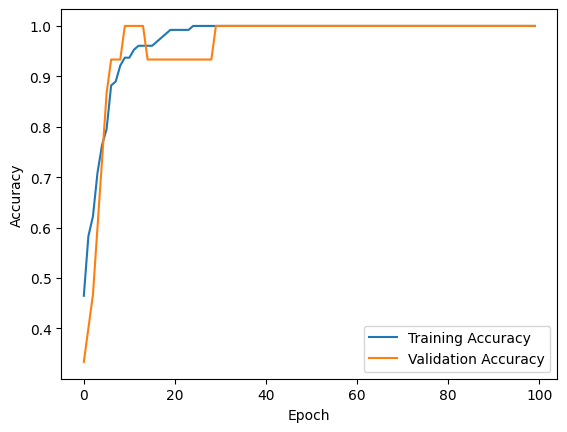

In [19]:
# PLot the model's training history
plt.plot(h.history['accuracy'],label='Training Accuracy')
plt.plot(h.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# California Housing Dataset Project


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [21]:
from sklearn.datasets import fetch_california_housing

#Load the California Housing Dataset
california_housing = fetch_california_housing()

#Create a DataFrame from the dataset
data = pd.DataFrame(data = california_housing.data,columns = california_housing.feature_names)
data['MEDV'] = california_housing.target

data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [22]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [24]:
data.shape

(20640, 9)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MEDV        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [26]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [27]:
# Split the dataset into training and testing sets

x = data.drop('MEDV',axis=1)
y = data['MEDV']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
x_train.shape, x_test.shape

((16512, 8), (4128, 8))

In [29]:
x_train[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [30]:
# Scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
x_train[:5]

array([[-0.326196  ,  0.34849025, -0.17491646, -0.20836543,  0.76827628,
         0.05137609, -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, -0.12853018, -0.09890135,
        -0.11736222, -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, -0.25753771, -0.44981806,
        -0.03227969, -0.46014647, -0.44760309],
       [-1.01786438,  0.58654547, -0.60001532, -0.14515634, -0.00743434,
         0.07750687, -1.38217186,  1.23269811],
       [-0.17148831,  1.14200767,  0.3490073 ,  0.08662432, -0.48587717,
        -0.06883176,  0.5320839 , -0.10855122]])

In [32]:
# Build the ANN Model
model = Sequential([
    Dense(64,activation = 'relu', input_shape=(x_train.shape[1],)),
    Dense(32,activation = 'relu'),
    Dense(1)
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                576       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2689 (10.50 KB)
Trainable params: 2689 (10.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


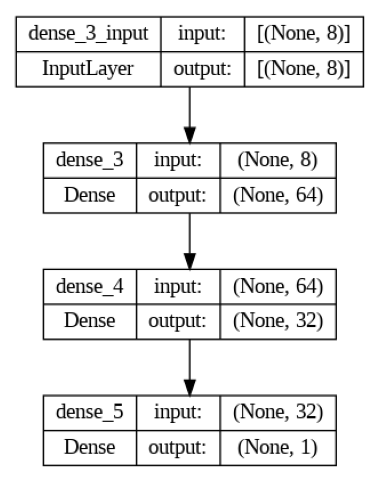

In [34]:
# Plot the ANN Model
plot_model(model,to_file = 'model_reg.png',show_shapes = True,show_layer_names=True)
plt.figure(figsize=(8,6))
img = plt.imread('model_reg.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
# Compile the model
model.compile(optimizer = 'adam',loss='mean_squared_error')

# Train the model and save its history
h = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
465/465 [==============================] - 4s 5ms/step - loss: 0.8892 - val_loss: 0.4511
Epoch 2/100
465/465 [==============================] - 1s 3ms/step - loss: 0.4100 - val_loss: 0.4082
Epoch 3/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3681 - val_loss: 0.4027
Epoch 4/100
465/465 [==============================] - 1s 3ms/step - loss: 0.3582 - val_loss: 0.3842
Epoch 5/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3416 - val_loss: 0.3664
Epoch 6/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3328 - val_loss: 0.3533
Epoch 7/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3284 - val_loss: 0.3536
Epoch 8/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3161 - val_loss: 0.3379
Epoch 9/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3083 - val_loss: 0.3324
Epoch 10/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3079 - val_lo

In [36]:
# Evaluate the model on the test set
test_loss = model.evaluate(x_test,y_test)

#Print the test loss
print("Test Loss : ",test_loss)

129/129 [==============================] - 0s 1ms/step - loss: 1.6926
Test Loss :  1.6925636529922485


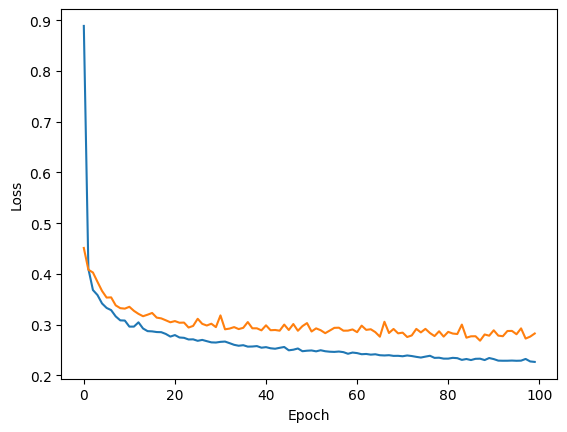

In [37]:
# Plot the model's training history
plt.plot(h.history['loss'],label='Training Loss')
plt.plot(h.history['val_loss'],label = 'Validation Loss')
plt.xlabel("Epoch")
plt.ylabel('Loss')

plt.show()